# Databases

Relational databases; Using SQLite & [DB Browser for SQLite](https://sqlitebrowser.org/) *or* [DBeaver](https://dbeaver.io/)

[Lecture SQL statements](https://www.py4e.com/lectures3/Pythonlearn-15-Database-Handout.txt)

__Attribute__ ---> __Column__

__Tuple__ ---> __Row__

__Relation__ ---> __Table__

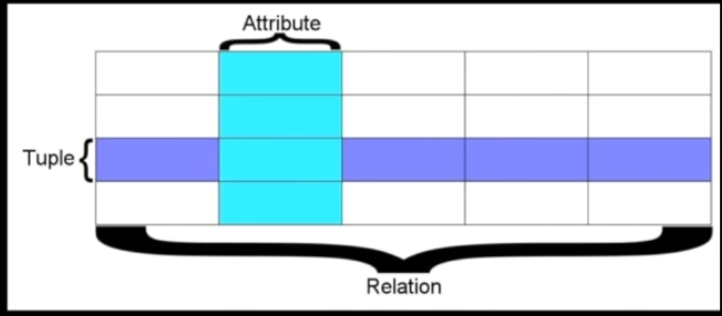

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="../aa_Screenshots/database.png")

### Create & access database in Python:

Create new database & establish a connection:

In [2]:
import sqlite3

## open if it exists, but if not create new database in same directory
conn = sqlite3.connect('emaildb.sqlite') 

## gateway to access database commands
cur = conn.cursor() 

If a table called `Counts` already exists, delete it so we can create a new table called `Counts` in the next cell:

In [3]:
cur.execute('DROP TABLE IF EXISTS Counts')



## this is also the same as above:
# cur.execute(''' 
#         CREATE TABLE IF NOT EXISTS Counts (email TEXT, count INTEGER)
# ''')

Create new table called `Counts` with an email & count field:

In [4]:
cur.execute('CREATE TABLE Counts (email TEXT, count INTEGER)')

1. Open/read file called 'emails.txt'
2. Find & retrieve email addresses (only if line starts with "From:"), then store them in a list
3. Loop through list & insert emails into SQL & count the number of each email address

Step 1:

In [5]:
file_name = 'emails.txt'

file_handle = open(file_name)

Step 2:

In [6]:
emails = []

for line in file_handle:
    ## skip lines that don't start with "From: "
    if not line.startswith('From: '):
        continue
    
    ## split the line by each word & store words in a list called "txt_pieces"
    txt_pieces = line.split()

    ## Get the 2nd "split piece" of the line, or index 1 of the list
    print(txt_pieces[1])
    emails.append(txt_pieces[1])

hunter123@walmart.gov
bob@walmart.gov
squidward@ohio.com
priscilla@kohlscash.org
bob@walmart.gov
refrigerator@ohio.com
queenelizabeth@iambritish.net
queenelizabeth@iambritish.net
queenelizabeth@iambritish.net


Step 3 (combining with Step 2):

In [7]:
for email in emails:
    ## Find out whether the email address already exists in table; can also act as an error-checker for any syntax errors or typos
    # NOTE: Question mark (?) is a placeholder so you don't have to directly type sensitive user data and to avoid SQL injection attacks;
    #       Can have multiple '?' placeholder & enter the variable name (e.g. email) of the resulting value in the tuple;
    #       If only one element, Comma after the end of element is required for tuple syntax (e.g. "(email,)"
    cur.execute('''
                    SELECT count FROM Counts 
                    WHERE email = ?
                ''', (email,)
    )
    row = cur.fetchone() # if no records to above SELECT statement, then resulting value is 'None'

    ## if email address doesn't already exist, insert email into the database with a starting count of 1
    if row is None:
        cur.execute(
            ''' 
                INSERT INTO Counts (email, count)
                VALUES (?, 1)
            ''', (email,)
        )
    
    ## if email address does exist, then add 1 to count
    else:
        cur.execute(
            ''' 
                UPDATE Counts
                SET count = count + 1
                WHERE email = ?
            ''', (email,)
        )
    
    ## Writes above SQL statements to disk, rather than just keeping the in memory
    # in this example, it's saving to disk for every iteration of this for loop
    conn.commit()


Print email addresses & their counts that have been inserted into the database, then close the database connection:

In [9]:
sqlstr = ''' 
        SELECT email, count FROM Counts
        ORDER BY count DESC
'''

for row in cur.execute(sqlstr):
    print(str(row[0]), str(row[1]))


## Close database connection
cur.close()

queenelizabeth@iambritish.net 3
bob@walmart.gov 2
hunter123@walmart.gov 1
squidward@ohio.com 1
priscilla@kohlscash.org 1
refrigerator@ohio.com 1


`emaildb.sqlite` database is now showing up in the same folder & can be opened up in DB Browser or DBeaver

<hr>

### Database Design

__Basic & most important rule: Try not to put the same <u>string</u> data in the same column of a table; create a new table & 
use a relationship to another table instead__
* Use integer keys (*primary* & *foreign* keys) for these relationships:

So instead of this:

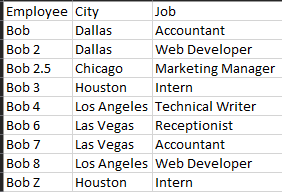

In [10]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="../aa_Screenshots/databasedesign1.png")

Consider something like this:

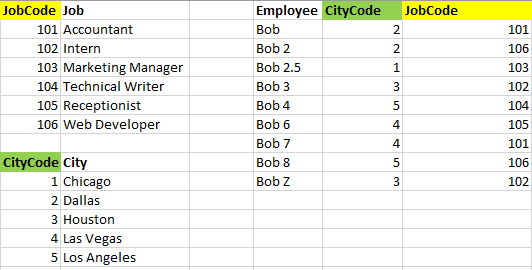

In [11]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="../aa_Screenshots/databasedesign2.png")

__Example: Digital Song Database (via DBeaver)__

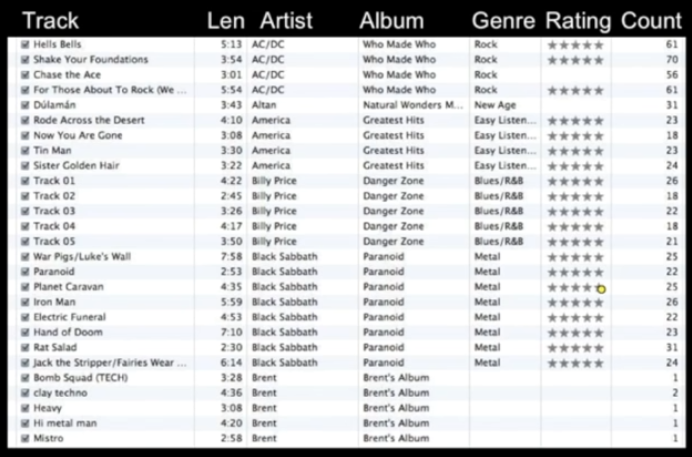

In [13]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="../aa_Screenshots/digtial-song-database.png", width=600)

Now divided into 4 separate relational tables:

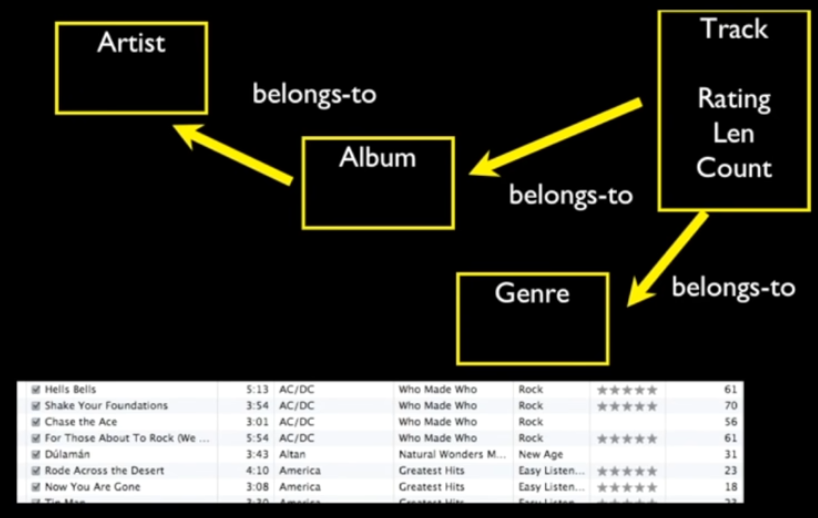

In [14]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="../aa_Screenshots/digtial-song-database2.png", width=600)

With these new tables, have them connect with integer keys:

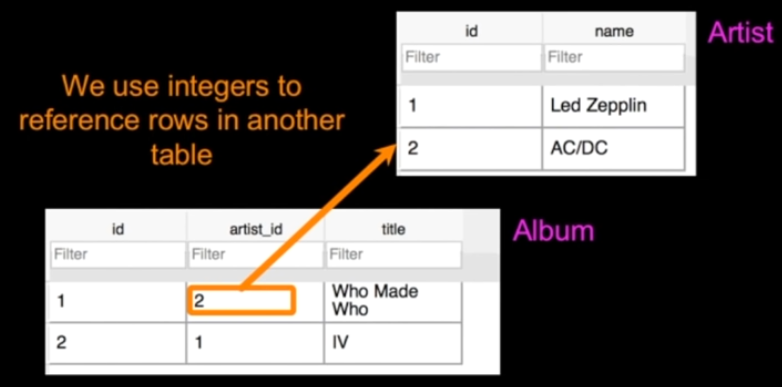

In [15]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="../aa_Screenshots/integer-keys.png", width=600)

__Three kinds of keys:__

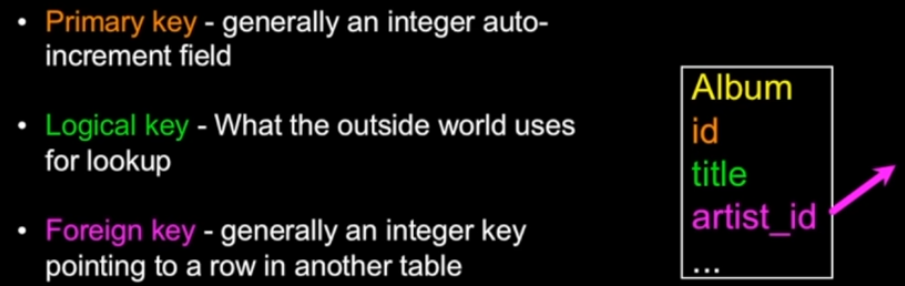

In [16]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="../aa_Screenshots/integer-keys2.png", width=600)

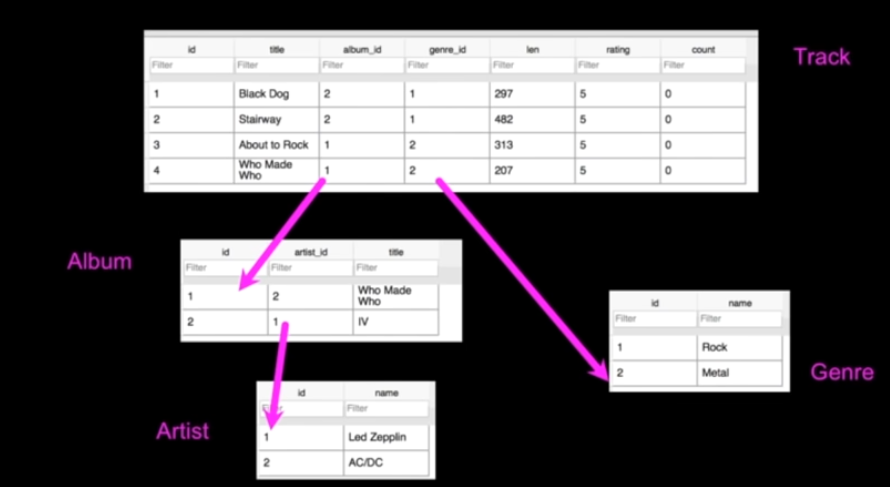

In [18]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="../aa_Screenshots/digtial-song-database3.png")

Resulting example for this mini-project:

```SQL
SELECT Track.title, Artist.name, Album.title, Genre.name 
FROM Track JOIN Genre JOIN Album JOIN Artist 
    ON Track.genre_id = Genre.id AND Track.album_id = Album.id 
    AND Album.artist_id = Artist.id
```

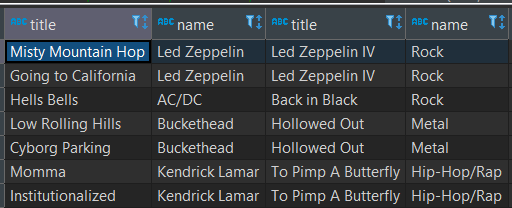

In [20]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="../aa_Screenshots/digtial-song-database-final.png")

<hr>

### Many to Many Relationships

__*One to many relationships*__ example: there is one artist (single table) to many songs (mass song table w/ artist ID to connect to single artist table; ID can repeat across multiple songs.


__*Many to many relationships*__ example: there are many students (mass student table) that are currently enrolled in many classes (mass class table)
* Another example: there are many products that can appear on multiple invoices

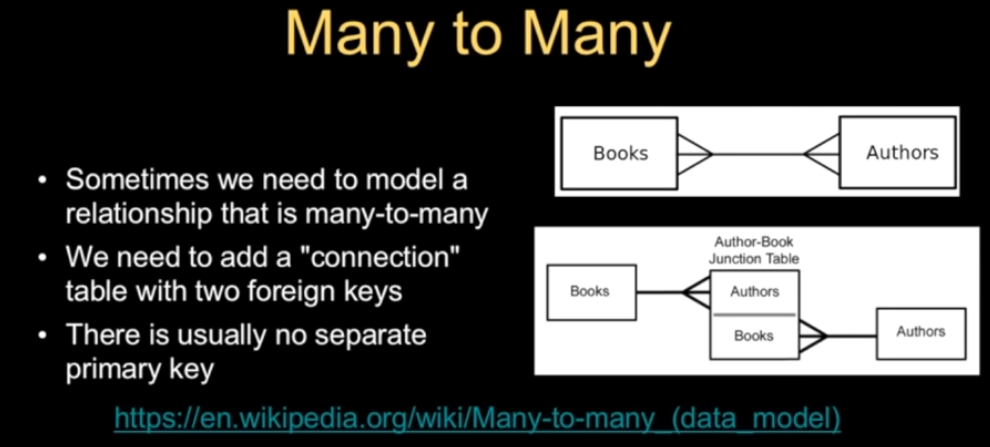

In [23]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="../aa_Screenshots/many-to-many.png", width=700)

__Need to have a separate connector table that bring two mass tables' info together__

This will essentially force a one-to-many relationship between the two tables

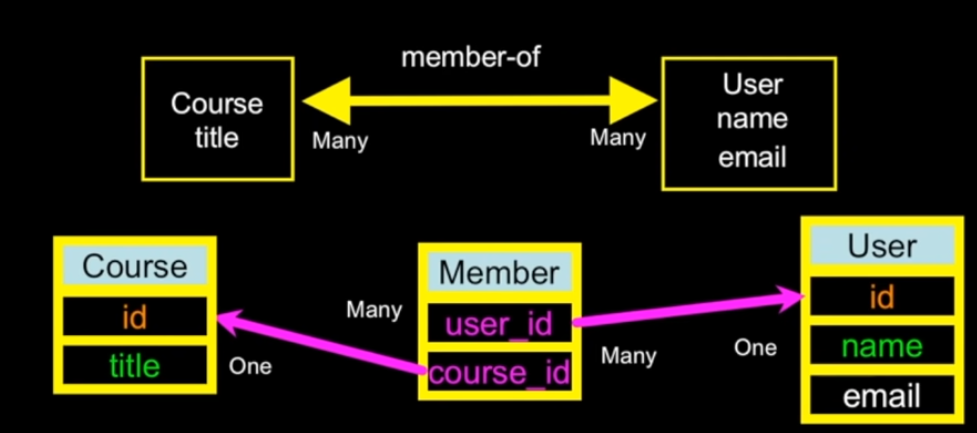

In [25]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="../aa_Screenshots/many-to-many2.png", width=700)

__Quick Example: Student/Professor Course Enrollment__

With `CourseEnrollments.db` via DBeaver

User table:


|id|name|email|
|--|----|-----|
|1|Priscilla|priscilla@walmartuniversity.edu|
|2|Squidward|squidward@walmartuniversity.edu|
|3|Refrigerator|refrigerator@walmartuniversity.edu|
|4|Bob|bob@walmartuniversity.edu|
|5|Queen Elizabeth|iambritish@walmartuniversity.edu|


Course table:


|id|title|
|--|-----|
|1|Tax Evasion 101|
|2|Advanced Philosophy, The Debated Existence of Florida|
|3|Intermediate Seminar on Watching Paint Dry|
|4|Pre-K Mathematics, Integral Calculus Edition|
|5|Introduction to the Morality of Toyotathon|
|6|Introduction to Building a Rogue, Sentient Robot (Fun)|


Member table (connecting User & Course tables):


|user_id|course_id|role|
|-------|---------|----|
|1|1|1|
|2|1|0|
|3|1|0|
|4|1|0|
|5|1|0|
|2|2|0|
|3|2|1|
|5|2|0|
|1|3|0|
|2|3|1|
|1|4|0|
|5|4|1|
|2|5|1|
|4|5|0|
|5|5|0|
|1|6|0|
|2|6|0|
|3|6|1|
|4|6|0|
|5|6|0|


Joined table:

```SQL
SELECT User.id AS 'User ID', User.name, Member.role, 
			CASE WHEN Member.role = 0 THEN 'Student'
				 ELSE 'Professor'
			END AS RoleDescription,
		Course.id AS 'Course ID', Course.title 
FROM User
JOIN MEMBER JOIN Course
ON Member.user_id = User.id AND Member.course_id = Course.id
ORDER BY Course.title, Member.role DESC, User.name;

```


|User ID|name|role|RoleDescription|Course ID|title|
|-------|----|----|---------------|---------|-----|
|3|Refrigerator|1|Professor|2|Advanced Philosophy, The Debated Existence of Florida|
|5|Queen Elizabeth|0|Student|2|Advanced Philosophy, The Debated Existence of Florida|
|2|Squidward|0|Student|2|Advanced Philosophy, The Debated Existence of Florida|
|2|Squidward|1|Professor|3|Intermediate Seminar on Watching Paint Dry|
|1|Priscilla|0|Student|3|Intermediate Seminar on Watching Paint Dry|
|3|Refrigerator|1|Professor|6|Introduction to Building a Rogue, Sentient Robot (Fun)|
|4|Bob|0|Student|6|Introduction to Building a Rogue, Sentient Robot (Fun)|
|1|Priscilla|0|Student|6|Introduction to Building a Rogue, Sentient Robot (Fun)|
|5|Queen Elizabeth|0|Student|6|Introduction to Building a Rogue, Sentient Robot (Fun)|
|2|Squidward|0|Student|6|Introduction to Building a Rogue, Sentient Robot (Fun)|
|2|Squidward|1|Professor|5|Introduction to the Morality of Toyotathon|
|4|Bob|0|Student|5|Introduction to the Morality of Toyotathon|
|5|Queen Elizabeth|0|Student|5|Introduction to the Morality of Toyotathon|
|5|Queen Elizabeth|1|Professor|4|Pre-K Mathematics, Integral Calculus Edition|
|1|Priscilla|0|Student|4|Pre-K Mathematics, Integral Calculus Edition|
|1|Priscilla|1|Professor|1|Tax Evasion 101|
|4|Bob|0|Student|1|Tax Evasion 101|
|5|Queen Elizabeth|0|Student|1|Tax Evasion 101|
|3|Refrigerator|0|Student|1|Tax Evasion 101|
|2|Squidward|0|Student|1|Tax Evasion 101|

